# ccClub: Python for Data Analysis
---

## Overview

- What is NumPy and Why Using It?
- Vectorized Operation vs For-Loop
- Basics of NumPy Array
- Aggregation & Common Summary Statistics
- Brodcasting
- Comparison, Boolean and Masking
- Putting Everything Together

## What is NumPy and Why Using it?

- Numpy (_Numerical Python_) is a Python library that supports large, multi-dimensional arrays and matrices.
- It also supports a wealth collection of high-level mathmatical functions.
- NumPy is designed to deal with **numerical** data in a very efficient way.
- Many data manipulation packages are built upon NumPy array, including Pandas.

- Install NumPy for Python3
```Python
pip3 install numpy
```

- Once your installation is finished, you can import your numpy package and check its version.

In [1]:
import numpy
numpy.__version__

'1.12.1'

### The core of NumPy: **_ndarray_**

- NumPy array encapsulates $n$-dimensional arrays of homogeneous data type. 
- Don't worry if you don't know what does this mean. We'll talk more about it in the follwoing section.

### What is a NumPy array?

- NumPy array looks similar to Python's `list` type but NumPy array provides more efficient storage and operations than Python's built-in `list`.
- NumPy array is a fixed-type array, meaning that we can only store the **same type** of data in this array.
- You may think that a Numpy array looks exactly the same as a `list`.
- Let's see the differences between a NumPy array and a Python `list`.

In [2]:
import numpy as np
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

### NumPy array and list

- NumPy array and Python list are both used to store data in Python and they both can be indexed and iterated.

In [3]:
myArray = np.array([2, 4, 6, 8, 10])
myList = [1, 3, 5, 7, 9]

myArray

array([ 2,  4,  6,  8, 10])

In [4]:
myList

[1, 3, 5, 7, 9]

In [5]:
print(myArray[0], myArray[-1])

2 10


In [6]:
for a in myArray:
    print(a)

2
4
6
8
10


**Difference between NumPy array and list**

- The main difference between NumPy array and `list` is the functions that you can use.
- For example if you try to divide the `list` by 2, an error will occur.

In [7]:
myList / 2

TypeError: unsupported operand type(s) for /: 'list' and 'int'

- However, you can divide NumPy array by 2.
- Observe that each element in the array is divided by 2.
- If we want to do the same operation in `list`, we will need to use a **`for-loop`** to loop over all elements in the `list`.
- This difference will become clearer later in the next section. Stay tuned!

In [8]:
myArray / 2

array([ 1.,  2.,  3.,  4.,  5.])

In [9]:
newList = []

for i in myList:
    newList.append(i / 2)

newList

[0.5, 1.5, 2.5, 3.5, 4.5]

### Let's create some arrays

- You can create arrays from Python lists.
- Remember that NumPy array can only contain data of the **same type**.
- If different types are presented, NumPy will change the type for you if possible, so be careful!
- Or you can specify the type for the array using **`dtype`**.

In [10]:
np.array([1, 2, 3])

array([1, 2, 3])

In [11]:
np.array([1, 2.0, 3.0])

array([ 1.,  2.,  3.])

In [12]:
np.array([1, 2, '3'])

array(['1', '2', '3'], 
      dtype='<U21')

In [13]:
np.array([0.5, 1, 'abc'])

array(['0.5', '1', 'abc'], 
      dtype='<U32')

In [14]:
np.array([1, 2, 3], dtype='float32')

array([ 1.,  2.,  3.], dtype=float32)

- You can also create arrays directly from NumPy.

In [15]:
# create 10 zero in a length-10 array
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [16]:
# create 10 one in a length-10 array
np.ones(10)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [17]:
# create an array from 0 to 9
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
# create an array from 0 to 19, stepping by 2
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

## Vectorized Operation VS For-Loop

- Remember previously we have shown that you can not divide a list by 2 directly. 
- But you can do it with a NumPy array. WHY?

### What is vectorization?

- When working with Python `list`, we need to use a `for-loop` to perform an operation on each single element.
- Instead of processing a single element one by one, vectorized operation allows you to process all the elements simultaneously from a single step.
- Recall from your linear algebra class, you can easily do vector operations with NumPy array.
- Vecotrization is one of the core of NumPy!

In [19]:
# vector operations
x = np.array([2, 4, 6, 8, 10])
print('x     =', x)
print('x + 1 =', x + 1)
print('x / 2 =', x / 2)

x     = [ 2  4  6  8 10]
x + 1 = [ 3  5  7  9 11]
x / 2 = [ 1.  2.  3.  4.  5.]


In [20]:
# for loop version of vector operations
y = [2, 4, 6, 8, 10]
print('y     =', y)
print('y + 1 =', [y[i] + 1 for i in range(len(y))])
print('y / 2 =', [y[i] / 2 for i in range(len(y))])

y     = [2, 4, 6, 8, 10]
y + 1 = [3, 5, 7, 9, 11]
y / 2 = [1.0, 2.0, 3.0, 4.0, 5.0]


### What is the benefit of vectorization?

- You'll probably wonder why do we need to use verctorized operation if we can do it with loops.

** Efficiency **
- Let's see an example of the inner product (dot product).
- You can implement a dot product using two lists (represent two vectors); however, **_it is slow_**.

> The dot product of two vectors $a = [a_1, a_2, ..., a_n]$ and $b = [b_1, b_2, ..., b_n]$ is defined as: 
$$
a \cdot b = \sum^n_{i = 1} a_i b_i = a_1 b_1 + a_2 b_2 + ... + a_n b_n
$$

In [21]:
a = np.arange(1000000)
b = np.arange(1000000)

**Using for loop**

In [22]:
%%time
dot1 = 0
for i in range(len(a)):
    dot1 += a[i] * b[i]

CPU times: user 624 ms, sys: 3.97 ms, total: 628 ms
Wall time: 630 ms


**Using vectorized operation**

In [23]:
%%time
dot2 = np.dot(a, b)

CPU times: user 3.77 ms, sys: 1.7 ms, total: 5.47 ms
Wall time: 4.26 ms


In [24]:
dot1 == dot2

True

### What is the benefit of vectorization?

** Readability **
- You can simply use `np.dot()` method to perform a dot product instead of writing a not so intuitive `for-loop`.
- Doing vector operations with NumPy is super easy and it is also very easy to read.
- You cannot perfom verctor operations on Python `list`.

In [25]:
# vector operation
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([5, 4, 3, 2, 1])
print(x1 + x2)
print(x1 - x2)

[6 6 6 6 6]
[-4 -2  0  2  4]


In [26]:
# for-loop version
print([y1[i] + y2[i] for i in range(len(y1))])
print([y1[i] - y2[i] for i in range(len(y1))])

NameError: name 'y1' is not defined

In [27]:
y1 = [1, 2, 3, 4, 5]
y2 = [5, 4, 3, 2, 1]
print(y1 + y2)        # list concatenation
print(y1 - y2)        # error!

[1, 2, 3, 4, 5, 5, 4, 3, 2, 1]


TypeError: unsupported operand type(s) for -: 'list' and 'list'

## Basics of NumPy Array

- We'll introduce some of the most important NumPy basics including attritubes and how to index and slice.

### NumPy Array Attributes

- NumPy array can be multi-dimensional.
- **ndim**: the number of dimensions
- **shape**: the size of each dimension
- **size**: the total size of the array

In [28]:
# one-dimensional array (vector)

x1 = np.arange(10)
print('dimensional: ', x1.ndim)
print('shape:', x1.shape)
print('size:', x1.size)
x1

dimensional:  1
shape: (10,)
size: 10


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
# two-dimensional array (5 by 2 matrix)

x2 = np.arange(10).reshape((2, 5))
print('dimensional: ', x2.ndim)
print('shape:', x2.shape)
print('size:', x2.size)
x2

dimensional:  2
shape: (2, 5)
size: 10


array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [30]:
# three-dimensional array (three 4 by 5 matrices)

x3 = np.arange(60).reshape((3, 4, 5))
print('dimensional: ', x3.ndim)
print('shape:', x3.shape)
print('size:', x3.size)
x3

dimensional:  3
shape: (3, 4, 5)
size: 60


array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

### Array Indexing

- Indexing array is very similar to indexing list.
- Indexing one-dimensional array is the same as indexing a list.

In [31]:
# one-dimension
print(x1[0])
print(x1[-1])

0
9


- In two dimensional, index is row-wise.
- You can apply multiple index as well.

In [32]:
# two-dimension
x2

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [33]:
print(x2[0])      # first row
print(x2[0][-1])  # last item of first row
print(x2[1,0])    # [row, column] second row, first column

[0 1 2 3 4]
4
5


In [34]:
# three-dimension
x3

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

In [35]:
print(x3[0])        # first matrix
print('\n')
print(x3[0][0])     # first row of the first matrix
print('\n')
print(x3[0, 0, 0])  # [dimension, row, column]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


[0 1 2 3 4]


0


### Array Slicing

- Slicing an array is also very similar to slicing a list.
- `array[start : stop : step]`

In [36]:
# one-dimension
print(x1)
print(x1[:5])
print(x1[::-1])    # reverse

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]
[9 8 7 6 5 4 3 2 1 0]


In [37]:
# two-dimension
x2

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [38]:
x2[:, :3]    # all rows, three columns

array([[0, 1, 2],
       [5, 6, 7]])

In [39]:
x2[:, ::2]   # all rows, every other column

array([[0, 2, 4],
       [5, 7, 9]])

- Combining indexing and slicing to access single column or row.

In [40]:
print(x2[:, 0])   # first column
print(x2[0, :])   # first row

[0 5]
[0 1 2 3 4]


### Reshaping & Modify Values

- We can use `.reshape()` method to change the shape of the array.
- Also like Python list, you can modify the values of the array.

In [41]:
x = np.array([1, 2, 3, 4, 5])
print(x.reshape((5, 1)))

[[1]
 [2]
 [3]
 [4]
 [5]]


In [42]:
x[0] = -100
x

array([-100,    2,    3,    4,    5])

## Aggregation & Common Summary Statistics

- NumPy provides a convenient way to aggreate the data.
- We can use these tools to do common summary statistics.

In [43]:
x = np.arange(20)
print(x)
print('Sum:', np.sum(x))
print('Min:', np.min(x))
print('Max:', np.max(x))
print('Min position:', np.argmin(x))
print('Max position:', np.argmax(x))
print('Product:', np.prod(x))
print('Mean:', np.mean(x))
print('Standard deviation:', np.std(x))
print('Median', np.median(x))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Sum: 190
Min: 0
Max: 19
Min position: 0
Max position: 19
Product: 0
Mean: 9.5
Standard deviation: 5.76628129734
Median 9.5


### Multi-dimensional Aggregation

- We can also aggregate multi-dimensional data using NumPy.
- By default, it will aggregatin the whole matrix.
- Use **`axis`** to aggregate over column or row.
- We can start doing simple data analysis already!

In [44]:
Matrix = x.reshape(4, 5)
print(Matrix)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [45]:
print(np.sum(Matrix))
print(Matrix.sum())

190
190


In [46]:
print(Matrix.sum(axis=0))  # sum over column
print(Matrix.sum(axis=1))  # sum over row

[30 34 38 42 46]
[10 35 60 85]


## Examples: Boston House Prices dataset

### NOTE: I still need to organize this part

In [47]:
from sklearn import datasets

# load and return the boston house-prices dataset.
boston = datasets.load_boston()

# DESCRIPTION of the dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [48]:
boston.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [49]:
boston.data.shape

(506, 13)

In [50]:
crime = boston.data[:, 0]
print(crime.mean())

3.59376071146


In [51]:
# load housing price data
price = boston.target
price.shape

(506,)

In [52]:
print('Mean:', price.mean())
print('Min:', price.min())
print('Max:', price.max())

Mean: 22.5328063241
Min: 5.0
Max: 50.0


1

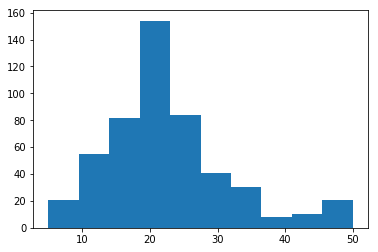

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(price)
1

## Broadcasting

- Recall that we can do vector operations with NumPy.
- Operations performed element wise on arrays of the same size.

In [54]:
x1 = np.array([1, 2, 3])
x2 = np.array([1, 2, 3])
print('x1 + x2 =', x1 + x2)

x1 + x2 = [2 4 6]


- But why can you add a scalar to an array? Aren't they different dimension?
- **Broadcasting** allows operations to be performed on arrays of different sizes. (dimensions)
- Imagine that NumPy automatically streaches or duplicates the value for you to match the shape of the array.

```python
array([1, 2, 3]) + 1 = array([1, 2, 3]) + array([1, 1, 1])
```

In [55]:
x = np.array([2, 4, 6, 8, 10])
print('x     =', x)
print('x + 1 =', x + 1)
print('x / 2 =', x / 2)

x     = [ 2  4  6  8 10]
x + 1 = [ 3  5  7  9 11]
x / 2 = [ 1.  2.  3.  4.  5.]


#### Extend to higher dimension.

```python
[[ 0  1  2  3  4]        [[ 0  1  2  3  4]   [[ 50 50 50 50 50]
 [ 5  6  7  8  9] + 50 =  [ 5  6  7  8  9] +  [ 50 50 50 50 50]
 [10 11 12 13 14]         [10 11 12 13 14]    [ 50 50 50 50 50]
 [15 16 17 18 19]]        [15 16 17 18 19]]   [ 50 50 50 50 50]]
```

```python
[[ 0  1  2  3  4]
 [ 5  6  7  8  9] + [ 2  4  6  8 10]
 [10 11 12 13 14]
 [15 16 17 18 19]]
```

```python
[[ 0  1  2  3  4]   [[ 2  4  6  8 10]
 [ 5  6  7  8  9] +  [ 2  4  6  8 10]
 [10 11 12 13 14]    [ 2  4  6  8 10]
 [15 16 17 18 19]]   [ 2  4  6  8 10]]
```

In [56]:
Matrix = np.arange(20).reshape(4,5)
print(Matrix)
print('\n')
print(Matrix + 50)    # broadcast scalar
print('\n')
print(Matrix + x)     # broadcast one-dimensional array

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


[[50 51 52 53 54]
 [55 56 57 58 59]
 [60 61 62 63 64]
 [65 66 67 68 69]]


[[ 2  5  8 11 14]
 [ 7 10 13 16 19]
 [12 15 18 21 24]
 [17 20 23 26 29]]


#### More complex example: streching both array.
```python
x1 = [0 1 2]

x2 = [[0]
      [1]
      [2]]

           [[0 1 2]      [[0 0 0]
x1 + x2 =   [0 1 2]   +   [1 1 1]
            [0 1 2]]      [2 2 2]]
```

In [57]:
x1 = np.arange(3)
x2 = np.arange(3).reshape(3, 1)
print(x1 + x2)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


### Example: Percentage

In [58]:
x = np.arange(10)
total = np.sum(x)
percentage = x / total * 100  # broadcasting!
print(x)
print(percentage)

[0 1 2 3 4 5 6 7 8 9]
[  0.           2.22222222   4.44444444   6.66666667   8.88888889
  11.11111111  13.33333333  15.55555556  17.77777778  20.        ]


## Comparison, Boolean and Masking

### Comparison

- Just like vector operations, we can also do comparison with NumPy very easily.
- We have seen that using `+`, `-`, `*`, `/` on arrays perform elment-wise operations. 
- Comparison operators such as `==`, `!=`, `<`, `>`, `>=`, `<=` also perform element-wise comparison.
- You will get another array with a Boolean type data when performing comparison.

In [59]:
x = np.arange(10)
print(x)
print(x == -1)
print(x > 5)

[0 1 2 3 4 5 6 7 8 9]
[False False False False False False False False False False]
[False False False False False False  True  True  True  True]


#### Combining broadcasting and comparison

In [60]:
x1 = np.array([2, 4, 6, 8, 10])
x2 = np.array([0, 1, 2, 3, 4])
print(x1 / 2 == x2 + 1)

[ True  True  True  True  True]


### Boolean

- After getting the boolean array, we can make use of the boolean array.
- Use `np.any()` or `np.all()` to check the array.

In [61]:
print(x)
print('Any entry > 10:', np.any(x > 10))
print('All entry < 10:', np.all(x < 10))

[0 1 2 3 4 5 6 7 8 9]
Any entry > 10: False
All entry < 10: True


#### Counting

- In the boolean array, `False` is 0 and `True` is 1.
- We can now count the number of `True` entries in the boolean array.

In [62]:
print(x)
print('Number of entires > 5:', np.sum(x > 5))

[0 1 2 3 4 5 6 7 8 9]
Number of entires > 5: 4


#### Boolean operators

- We can also use **_logic operators_** such as `&(and)`, `|(or)`, `^(xor)`, `~(not)` in NumPy. 
- And as expected, they also work element-wise on arrays.
- **Parentheses** matters!

In [63]:
x = np.arange(50)
(x > 10) & (x < 30)

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False], dtype=bool)

In [64]:
(x > 10 & x ) < 30

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

### Masking

- To select a subsets of the data, we can use boolean arrays as masks.
- NumPy index on the boolean array to select the values. (select `True`)

**One dimension**
```python
[ 10    20    30    40    50     60    70    80    90    100]
[False False False False False  True  True  True  True  True]
                               [ 60    70    80    90    100]
```

In [65]:
# one-dimension

age = np.arange(10, 110, 10)
print(age)
print(age > 50)
print(age[age > 50])

[ 10  20  30  40  50  60  70  80  90 100]
[False False False False False  True  True  True  True  True]
[ 60  70  80  90 100]


**Two-dimension**

```python
grades           
           classA  classB  classC
Midterm1 [[   37     12      72]
Midterm2  [    9     75       5]
Final     [   79     64      16]]

```

```python
grades > 60       
           classA  classB  classC
Midterm1 [[ False   False   True]
Midterm2  [ False    True  False]
Final     [  True    True  False]]
```

In [66]:
# two-dimension
np.random.seed(1)

grades = np.random.randint(100, size=(3,3))
print(grades[grades > 60])

[72 75 79 64]


## Putting Everything Together

### Need to figure out an example